### Project Overview

This project focuses on enhancing weather forecasting accuracy through the integration of machine learning algorithms. Utilizing a comprehensive dataset from Google Cloud's BigQuery service, the project employs Random Forest and Principal Component Analysis (PCA) to analyze and understand complex weather patterns. The dataset, rich in meteorological variables, undergoes thorough preprocessing and feature engineering, setting the stage for effective and accurate predictive modeling.

#### Data Dictionary

The dataset comprises the following columns, each representing a key meteorological measure or identifier:

- **name**: Name of the weather station.
- **stn**: Station identifier, part of the unique key.
- **wban**: Weather-Bureau-Army-Navy identifier, part of the unique key.
- **date**: Timestamp of the observation, constructed from year, month, and day.
- **temperature**: Temperature recorded at the station.
- **dewp**: Dew point temperature.
- **slp**: Sea level pressure.
- **stp**: Station pressure.
- **visib**: Visibility in miles.
- **wdsp**: Wind speed.
- **mxpsd**: Maximum sustained wind speed.
- **gust**: Wind gust speed.
- **max**: Maximum temperature.
- **min**: Minimum temperature.
- **prcp**: Precipitation amount.
- **sndp**: Snow depth.
- **fog**: Indicator for the presence of fog.
- **rain_drizzle**: Indicator for rain or drizzle.
- **snow_ice_pellets**: Indicator for snow or ice pellets.
- **hail**: Indicator for hail.
- **thunder**: Indicator for thunder.
- **tornado_funnel_cloud**: Indicator for a tornado or funnel cloud.

### Loading in the dataframe and exploring its structure

In [1]:
import pandas as pd

weather_df = pd.read_csv('weather_data.csv')

In [2]:
weather_df.head()

,name,stn,wban,date,temp,dewp,slp,stp,visib,wdsp,...,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-01 00:00:00.000000 UTC,27.0,23.5,1013.0,951.5,6.7,7.6,...,28.4,23.0,0.02,999.9,0,0,1,0,0,0
1,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-02 00:00:00.000000 UTC,23.8,19.4,1011.4,949.8,7.6,7.7,...,28.0,21.9,0.02,999.9,0,0,1,0,0,0
2,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-03 00:00:00.000000 UTC,26.8,24.0,1005.2,944.2,6.4,8.7,...,30.0,19.0,0.01,999.9,1,1,1,0,0,0
3,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-04 00:00:00.000000 UTC,4.2,-1.1,1022.3,956.0,5.1,4.7,...,30.0,-9.9,0.06,999.9,0,0,1,0,0,0
4,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-05 00:00:00.000000 UTC,-13.7,-18.1,1035.2,969.5,9.3,0.3,...,-4.0,-22.0,0.00,999.9,0,0,0,0,0,0


In [3]:
weather_df.tail()

,name,stn,wban,date,temp,dewp,slp,stp,visib,wdsp,...,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
47203,KINGS POINT,997280,99999,2021-09-03 00:00:00.000000 UTC,66.6,9999.9,1017.1,999.9,999.9,9.6,...,73.6,61.2,0.0,999.9,0,0,0,0,0,0
47204,KINGS POINT,997280,99999,2021-09-04 00:00:00.000000 UTC,69.3,9999.9,1017.3,999.9,999.9,5.5,...,77.0,63.3,0.0,999.9,0,0,0,0,0,0
47205,KINGS POINT,997280,99999,2021-09-05 00:00:00.000000 UTC,70.4,9999.9,1012.8,999.9,999.9,9.5,...,73.4,66.6,0.0,999.9,0,0,0,0,0,0
47206,KINGS POINT,997280,99999,2021-09-06 00:00:00.000000 UTC,74.2,9999.9,1009.8,999.9,999.9,8.8,...,80.6,70.3,0.0,999.9,0,0,0,0,0,0
47207,KINGS POINT,997280,99999,2021-09-07 00:00:00.000000 UTC,72.7,9999.9,1014.4,999.9,999.9,5.5,...,79.0,68.4,0.0,999.9,0,0,0,0,0,0


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47208 entries, 0 to 47207
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  47208 non-null  object 
 1   stn                   47208 non-null  int64  
 2   wban                  47208 non-null  int64  
 3   date                  47208 non-null  object 
 4   temp                  47208 non-null  float64
 5   dewp                  47208 non-null  float64
 6   slp                   47208 non-null  float64
 7   stp                   47208 non-null  float64
 8   visib                 47208 non-null  float64
 9   wdsp                  47208 non-null  float64
 10  mxpsd                 47208 non-null  float64
 11  gust                  47208 non-null  float64
 12  max                   47208 non-null  float64
 13  min                   47208 non-null  float64
 14  prcp                  47208 non-null  float64
 15  sndp               

In [5]:
# Get summary statistics for the dataframe
summary_stats = weather_df.describe(include='all')
summary_stats

,name,stn,wban,date,temp,dewp,slp,stp,visib,wdsp,...,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
count,47208,47208.000000,47208.000000,47208,47208.000000,47208.000000,47208.000000,47208.000000,47208.00000,47208.000000,...,47208.000000,47208.000000,47208.000000,47208.000000,47208.000000,47208.000000,47208.000000,47208.000000,47208.000000,47208.000000
unique,24,NaN,NaN,2192,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GREATER ROCHESTER INTERNATION,NaN,NaN,2016-10-10 00:00:00.000000 UTC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2192,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,770691.535926,50294.670268,NaN,50.544984,1229.437748,2065.669560,1542.333073,165.21622,54.939093,...,62.404031,41.136072,0.099537,958.935036,0.115616,0.335028,0.136629,0.000318,0.040904,0.000021
std,NaN,98418.043383,38250.638908,NaN,17.888486,3229.374601,2884.519318,2556.474528,361.03496,215.056049,...,104.012059,67.226776,0.262812,197.779846,0.319767,0.472005,0.343459,0.017823,0.198070,0.004602
min,NaN,722098.000000,465.000000,NaN,-18.300000,-27.100000,987.400000,0.000000,0.20000,0.000000,...,-9.900000,-32.100000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,725150.000000,14747.000000,NaN,36.300000,27.900000,1013.000000,953.900000,9.00000,3.600000,...,46.000000,28.000000,0.000000,999.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,725220.000000,54790.000000,NaN,51.000000,45.500000,1017.900000,990.400000,10.00000,5.800000,...,63.000000,40.800000,0.000000,999.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,744860.000000,94740.000000,NaN,66.200000,61.900000,1024.600000,1002.900000,10.00000,8.700000,...,78.100000,55.000000,0.060000,999.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Check for null/missing values
missing_values = weather_df.isnull().sum()
missing_values

name                    0
stn                     0
wban                    0
date                    0
temp                    0
dewp                    0
slp                     0
stp                     0
visib                   0
wdsp                    0
mxpsd                   0
gust                    0
max                     0
min                     0
prcp                    0
sndp                    0
fog                     0
rain_drizzle            0
snow_ice_pellets        0
hail                    0
thunder                 0
tornado_funnel_cloud    0
dtype: int64

### Data Preprocessing

In [7]:
# 999.9 are placeholders for missing data
weather_df.replace(999.9, float('NaN'), inplace=True)

In [8]:
# Convert date column to datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [9]:
# Display changes
weather_df.head()

,name,stn,wban,date,temp,dewp,slp,stp,visib,wdsp,...,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-01 00:00:00+00:00,27.0,23.5,1013.0,951.5,6.7,7.6,...,28.4,23.0,0.02,NaN,0,0,1,0,0,0
1,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-02 00:00:00+00:00,23.8,19.4,1011.4,949.8,7.6,7.7,...,28.0,21.9,0.02,NaN,0,0,1,0,0,0
2,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-03 00:00:00+00:00,26.8,24.0,1005.2,944.2,6.4,8.7,...,30.0,19.0,0.01,NaN,1,1,1,0,0,0
3,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-04 00:00:00+00:00,4.2,-1.1,1022.3,956.0,5.1,4.7,...,30.0,-9.9,0.06,NaN,0,0,1,0,0,0
4,ADIRONDACK REGIONAL ARPT,726228,94740,2016-01-05 00:00:00+00:00,-13.7,-18.1,1035.2,969.5,9.3,0.3,...,-4.0,-22.0,0.00,NaN,0,0,0,0,0,0


In [10]:
# Assess missing values
missing_values_post_placeholder_handling = weather_df.isnull().sum()
print(missing_values_post_placeholder_handling)

name                        0
stn                         0
wban                        0
date                        0
temp                        0
dewp                        0
slp                        22
stp                      4009
visib                    7440
wdsp                     2324
mxpsd                    5032
gust                    22268
max                         0
min                         0
prcp                        0
sndp                    45266
fog                         0
rain_drizzle                0
snow_ice_pellets            0
hail                        0
thunder                     0
tornado_funnel_cloud        0
dtype: int64


In [11]:
# Set 'date' as the index of the dataframe to perform interpolation for handling missing values
weather_df.set_index('date', inplace=True)

In [12]:
# Interpolate the missing values
weather_df['slp'] = weather_df['slp'].interpolate(method='time')
weather_df['stp'] = weather_df['stp'].interpolate(method='time')
weather_df['visib'] = weather_df['visib'].interpolate(method='time')
weather_df['wdsp'] = weather_df['wdsp'].interpolate(method='time')
weather_df['mxpsd'] = weather_df['mxpsd'].interpolate(method='time')
weather_df['gust'] = weather_df['mxpsd'].interpolate(method='time')

In [13]:
# for columns that have an excessive number of missing values, such as 'sndp'
# If a columns has too many missing values, it is better to drop it
missing_threshold = 0.8
total_rows = weather_df.shape[0]
for column in weather_df.columns:
    if weather_df[column].isnull().sum() / total_rows > missing_threshold:
        weather_df.drop(column, axis=1, inplace=True)

In [14]:
# Reset index to make 'date' a column
weather_df.reset_index(inplace=True)

In [15]:
# check the summary of missing values again
missing_values_updated = weather_df.isnull().sum()
missing_values_updated

date                    0
name                    0
stn                     0
wban                    0
temp                    0
dewp                    0
slp                     0
stp                     0
visib                   0
wdsp                    0
mxpsd                   0
gust                    0
max                     0
min                     0
prcp                    0
fog                     0
rain_drizzle            0
snow_ice_pellets        0
hail                    0
thunder                 0
tornado_funnel_cloud    0
dtype: int64

### Exploratory Data Analysis

1. ##### Univariate Analysis

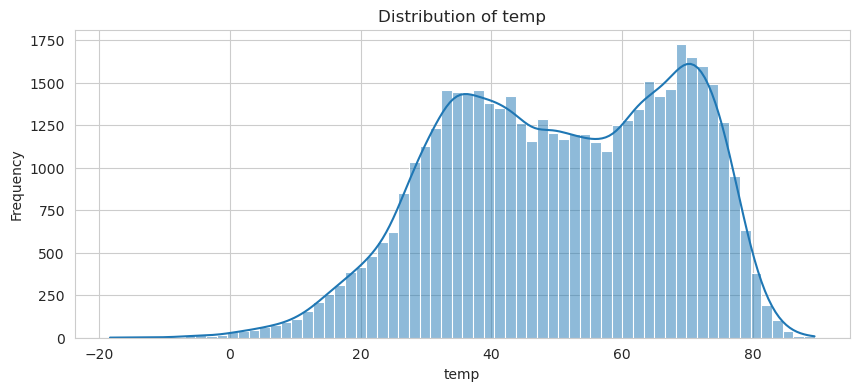

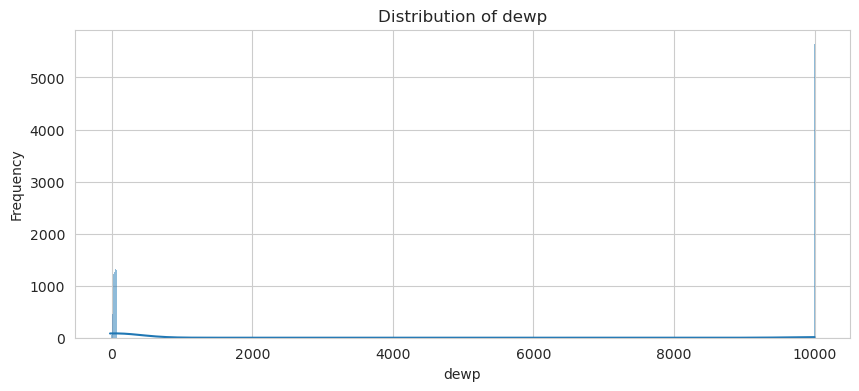

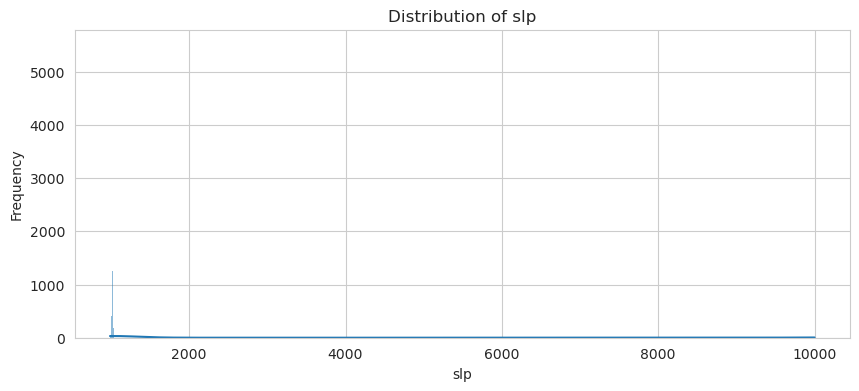

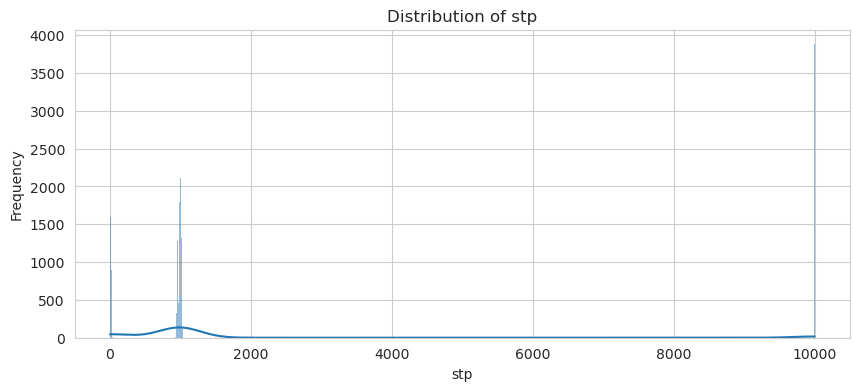

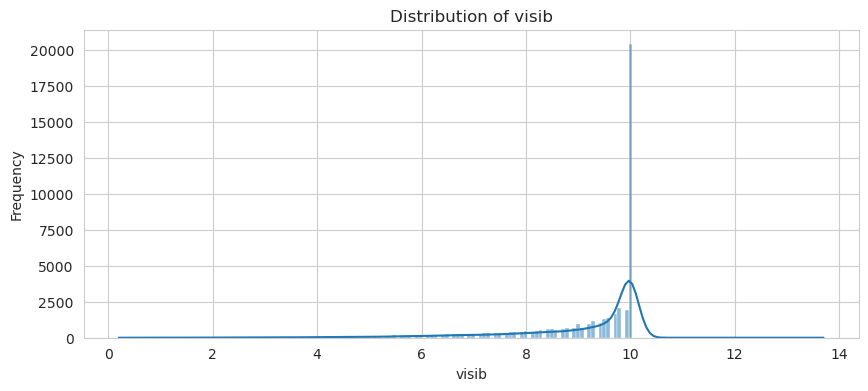

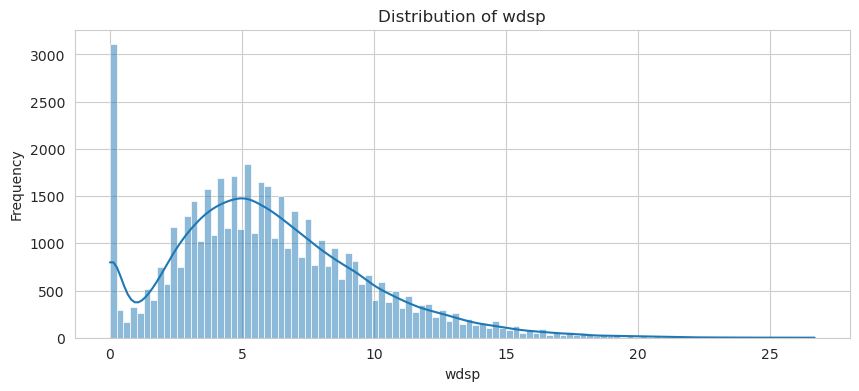

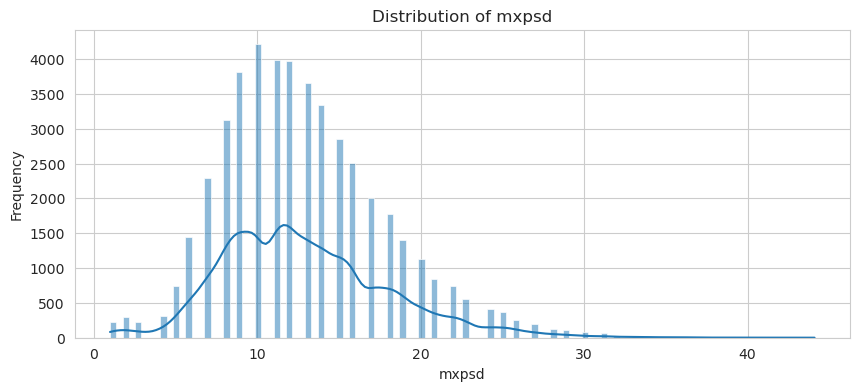

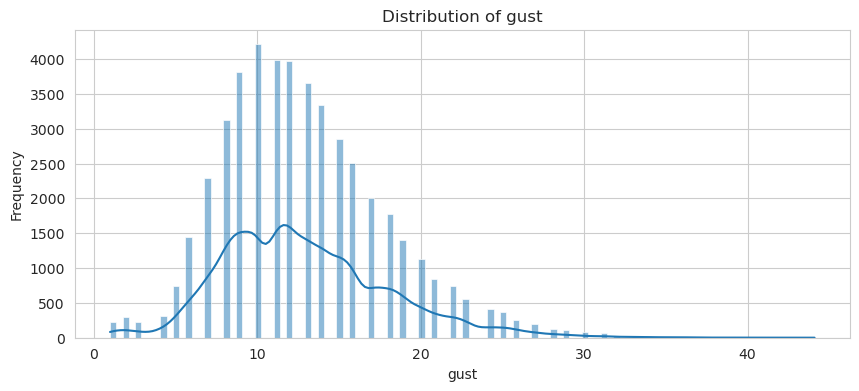

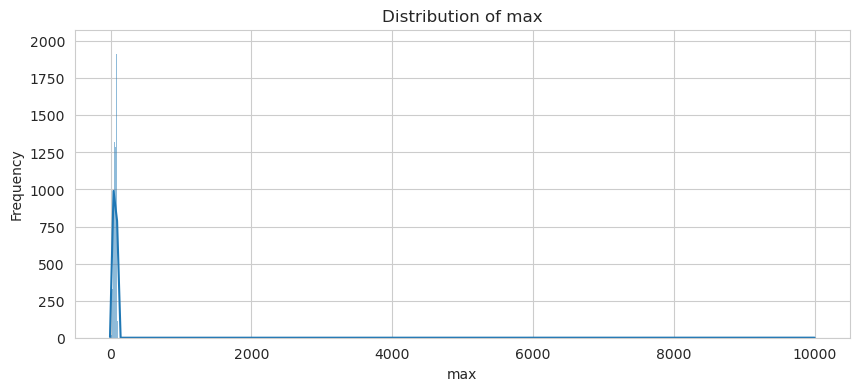

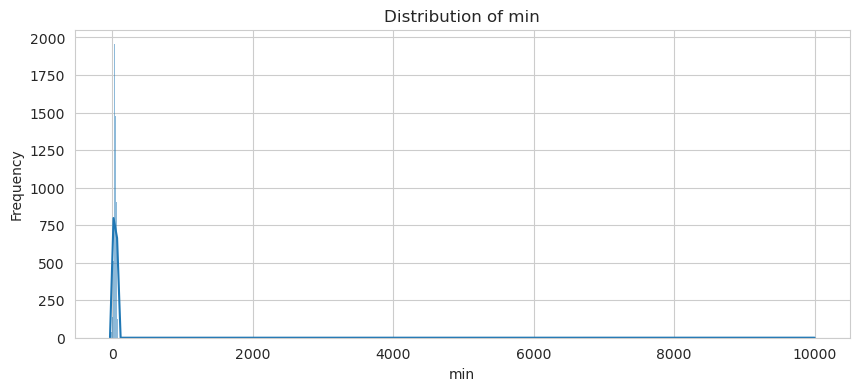

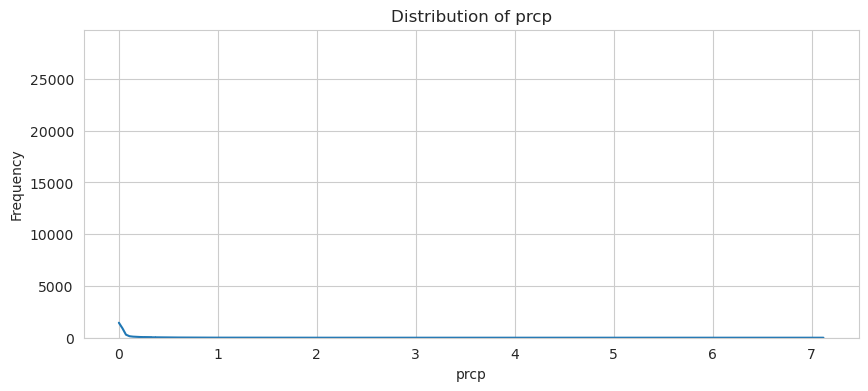

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# numerical columns for univariate analysis
num_cols = ['temp', 'dewp', 'slp', 'stp', 'visib', 'wdsp', 'mxpsd', 'gust', 'max', 'min', 'prcp']

# Plotting histograms for each numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(weather_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

2. ##### Bivariate Analysis

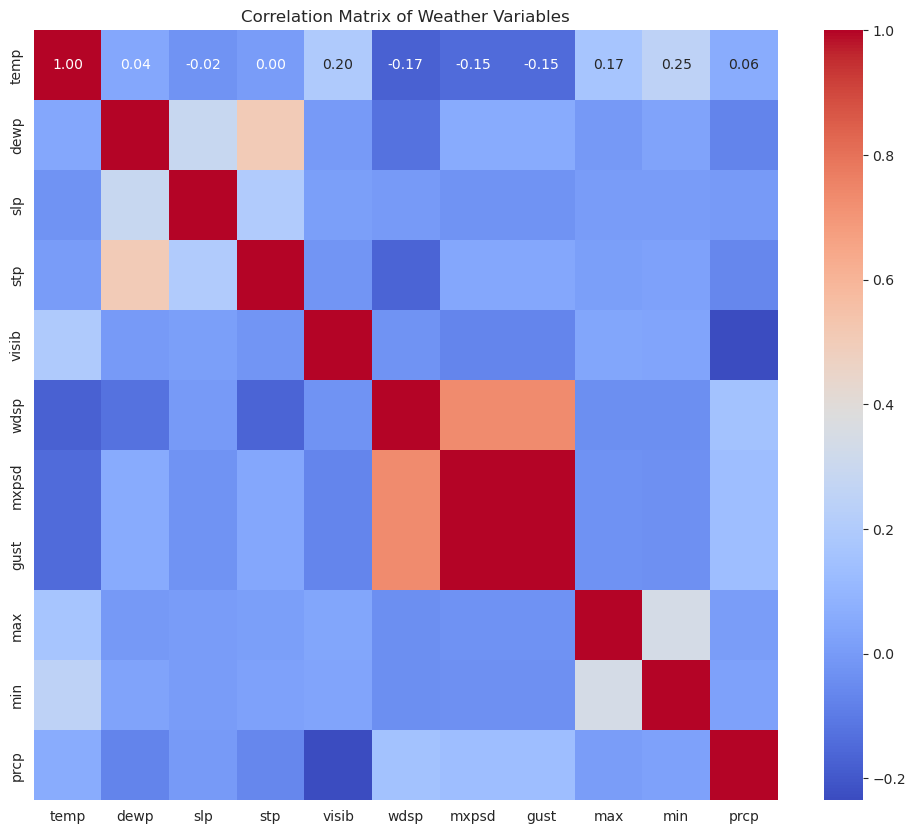

In [18]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = weather_df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Variables')
plt.show()

In [19]:
# Calculate the correlation matrix
correlation_matrix = weather_df.corr()

correlation_matrix

,stn,wban,temp,dewp,slp,stp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
stn,1.000000,0.446564,0.033926,0.850231,0.209289,0.584596,-0.003502,-0.253145,-0.032248,-0.032248,-0.002009,0.025469,-0.090832,-0.157924,-0.304145,-0.175010,-0.007759,-0.087955,-0.001208
wban,0.446564,1.000000,0.038581,0.353573,-0.000313,0.247050,0.005918,-0.169560,-0.059424,-0.059424,0.001010,0.020717,-0.044243,-0.112258,-0.126554,-0.088274,-0.011596,-0.068947,-0.004281
temp,0.033926,0.038581,1.000000,0.041664,-0.024991,0.004898,0.196626,-0.174044,-0.145127,-0.145127,0.169067,0.248945,0.059899,-0.018852,0.137514,-0.501429,0.002440,0.200387,0.001223
dewp,0.850231,0.353573,0.041664,1.000000,0.287046,0.503431,-0.003360,-0.127108,0.055783,0.055783,-0.005192,0.025906,-0.074578,-0.132578,-0.259298,-0.148563,-0.006540,-0.074756,-0.001682
slp,0.209289,-0.000313,-0.024991,0.287046,1.000000,0.200687,0.013142,-0.001486,-0.023958,-0.023958,0.002309,0.005476,0.000770,-0.054711,-0.154023,-0.123770,-0.006523,-0.037089,-0.001671
stp,0.584596,0.247050,0.004898,0.503431,0.200687,1.000000,-0.019623,-0.164465,0.044522,0.044522,0.015035,0.022828,-0.062339,-0.086016,-0.193132,-0.098383,-0.004469,-0.052283,-0.000872
visib,-0.003502,0.005918,0.196626,-0.003360,0.013142,-0.019623,1.000000,-0.024951,-0.066861,-0.066861,0.035609,0.034163,-0.234957,-0.494519,-0.193910,-0.327681,0.003818,-0.011398,0.002932
wdsp,-0.253145,-0.169560,-0.174044,-0.127108,-0.001486,-0.164465,-0.024951,1.000000,0.733601,0.733601,-0.038184,-0.039502,0.155661,-0.039979,0.191363,0.225339,0.013303,0.046704,0.000478
mxpsd,-0.032248,-0.059424,-0.145127,0.055783,-0.023958,0.044522,-0.066861,0.733601,1.000000,1.000000,-0.028046,-0.035597,0.136236,-0.016860,0.178981,0.181338,0.028211,0.129329,0.003718
gust,-0.032248,-0.059424,-0.145127,0.055783,-0.023958,0.044522,-0.066861,0.733601,1.000000,1.000000,-0.028046,-0.035597,0.136236,-0.016860,0.178981,0.181338,0.028211,0.129329,0.003718


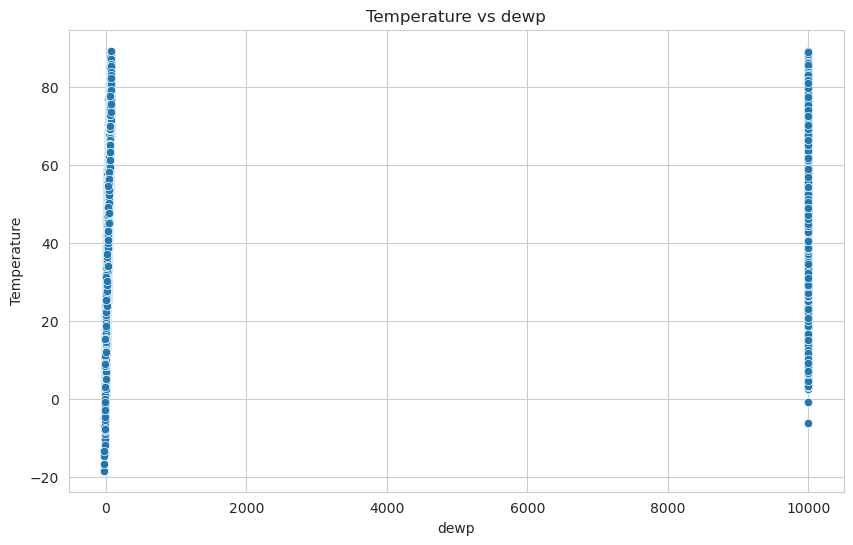

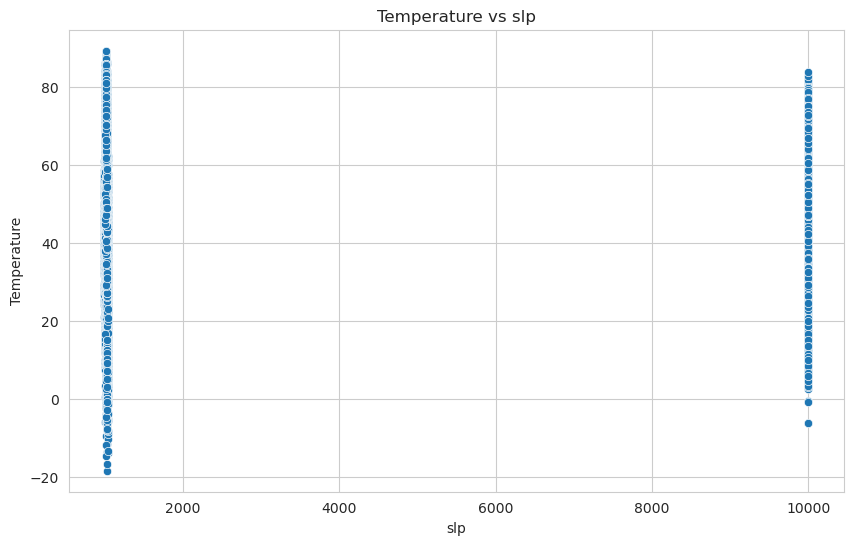

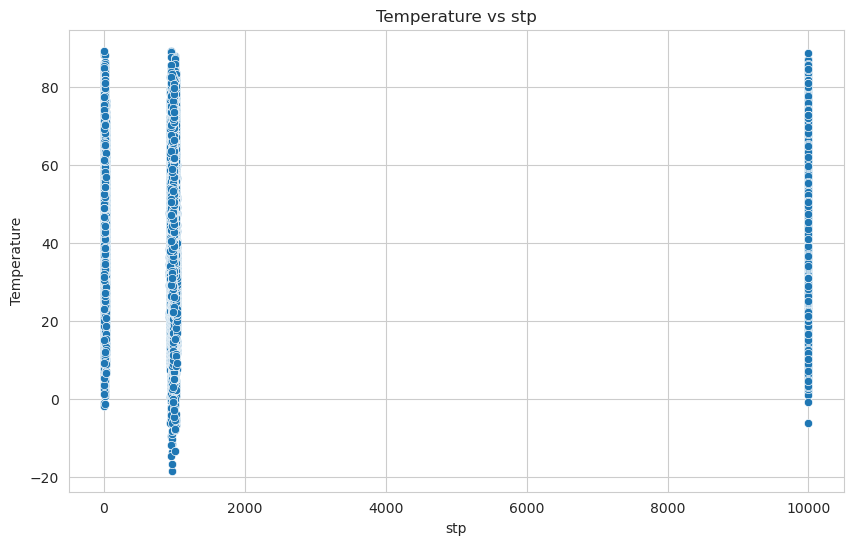

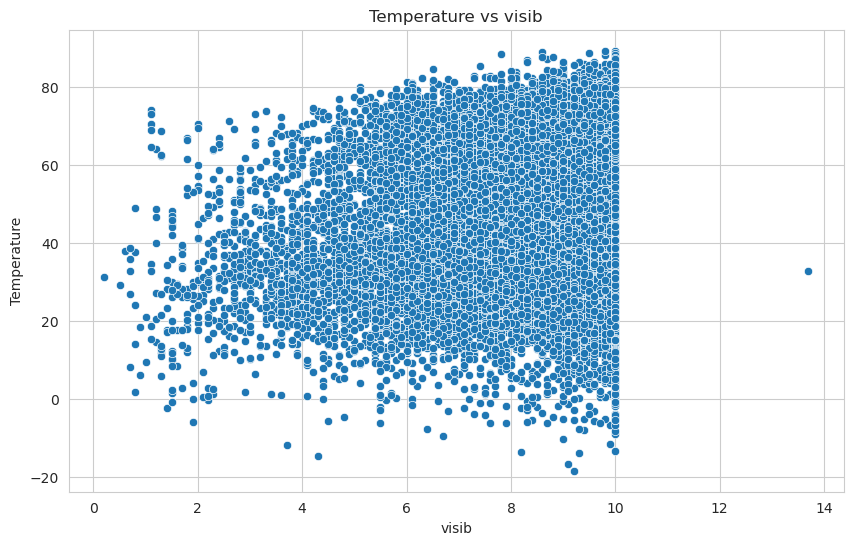

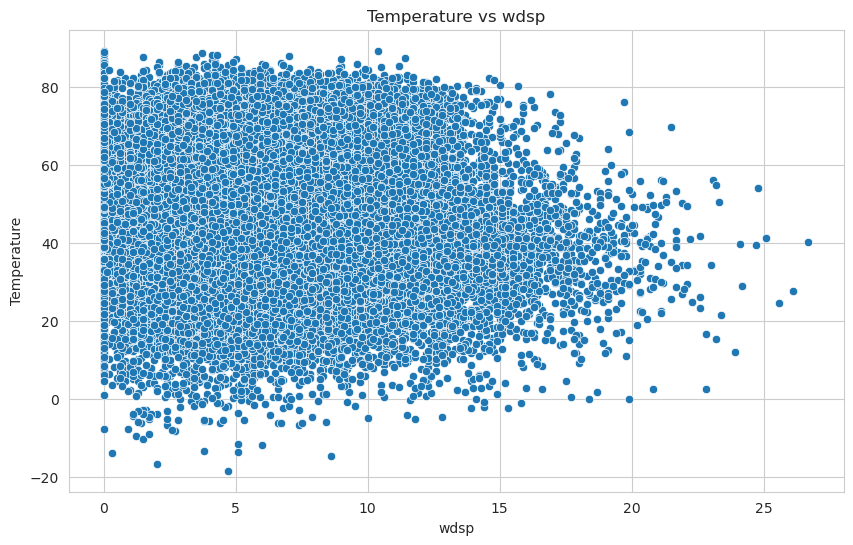

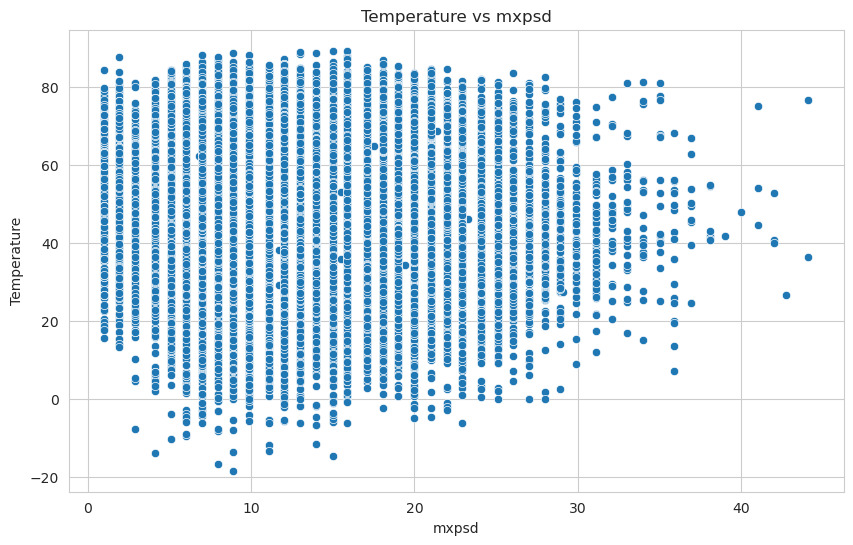

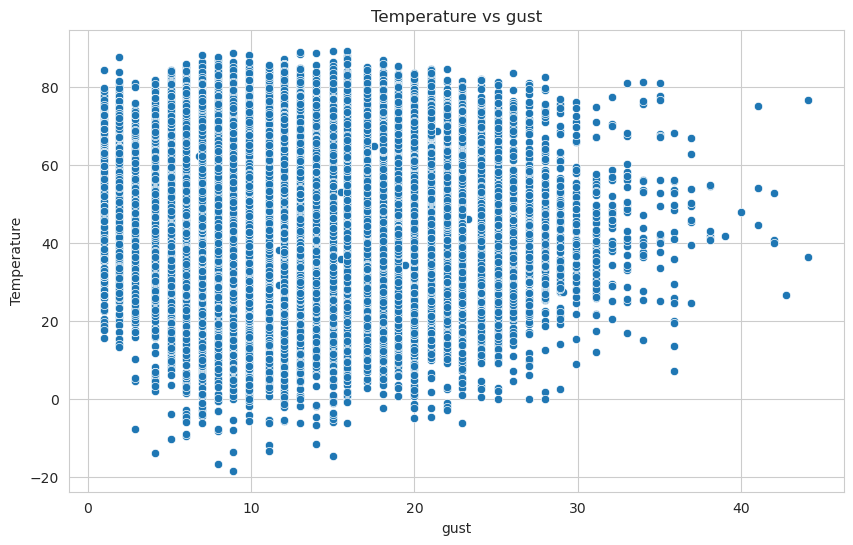

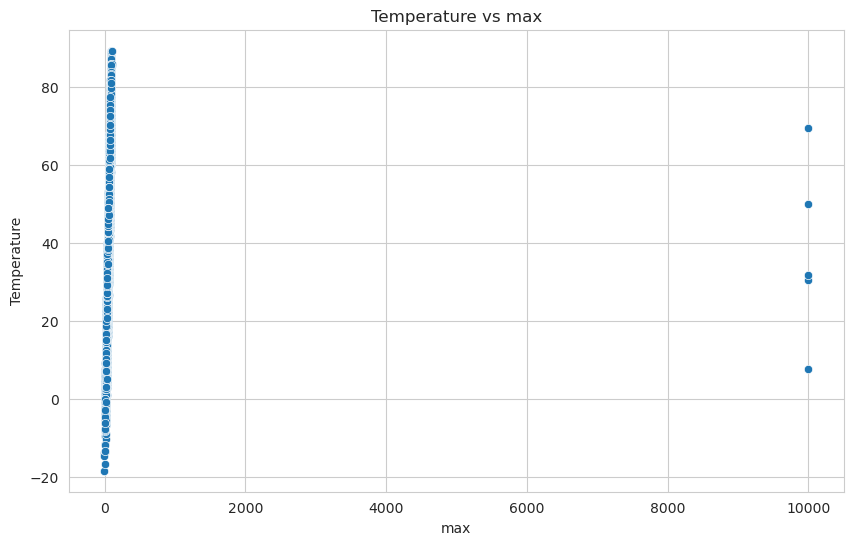

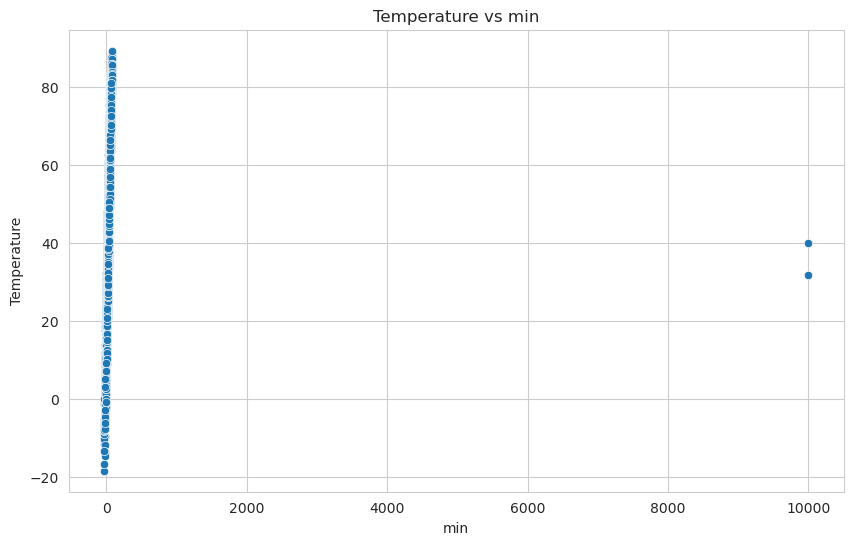

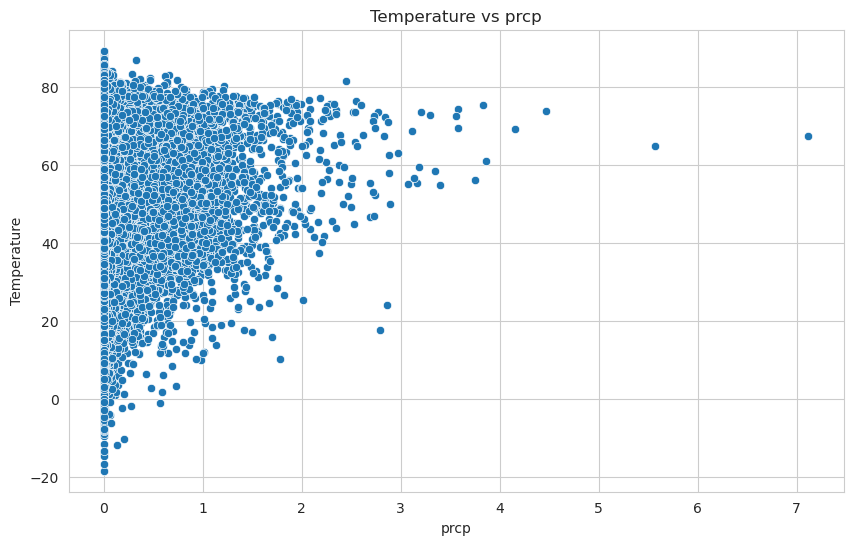

In [20]:
# Scatter plot for each numerical column with temperature
for col in num_cols:
    if col != 'temp':  # Exclude the plot of 'temp' with itself
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=weather_df[col], y=weather_df['temp'])
        plt.title(f'Temperature vs {col}')
        plt.xlabel(col)
        plt.ylabel('Temperature')
        plt.show()

##### 3. Time Series Analysis

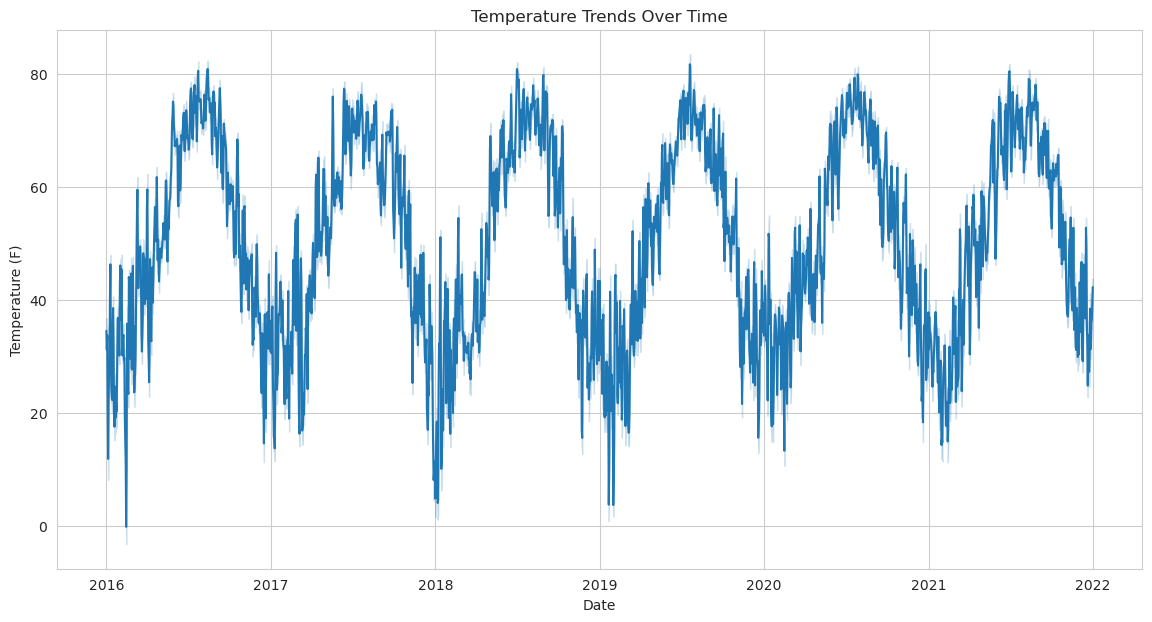

In [21]:
# Reset index to use the date on the x-axis
weather_df.reset_index(inplace=True)

# Plotting temperature over time
plt.figure(figsize=(14, 7))
sns.lineplot(x=weather_df['date'], y=weather_df['temp'])
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

##### 4. Check for outliers

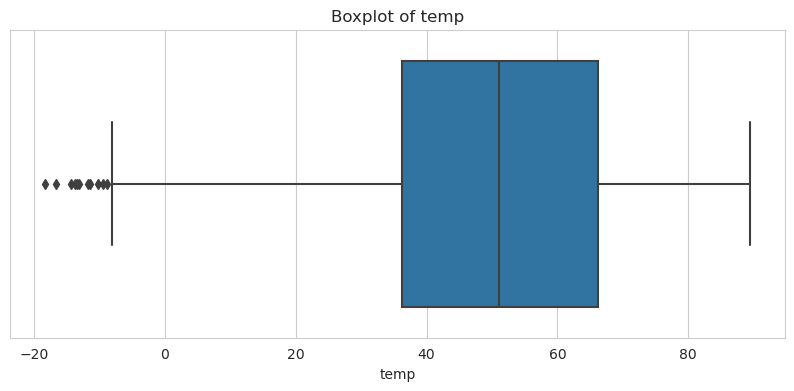

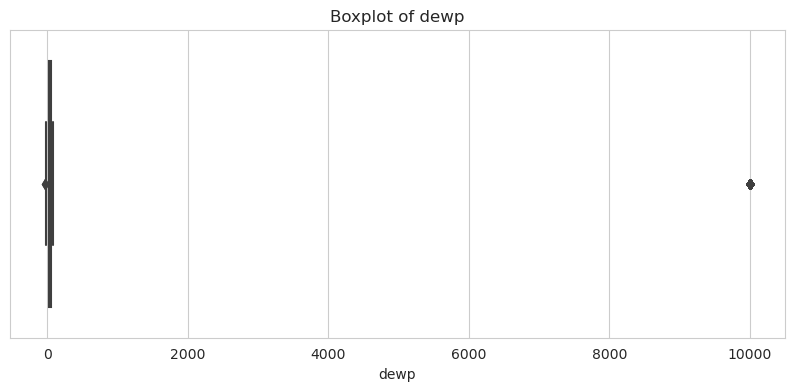

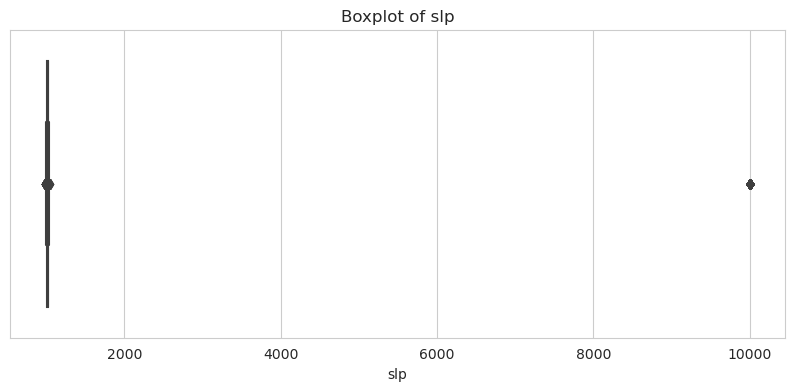

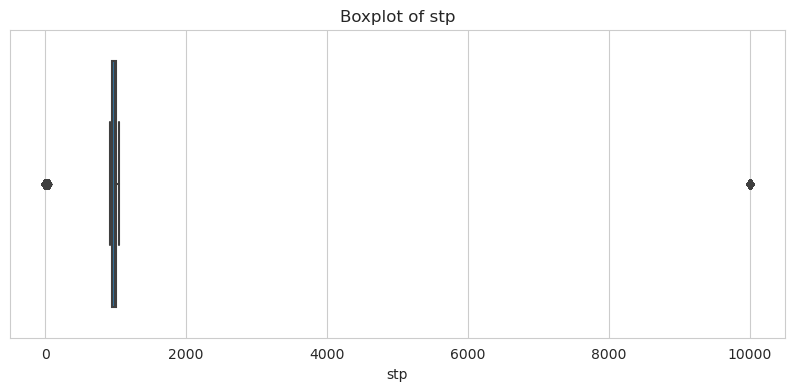

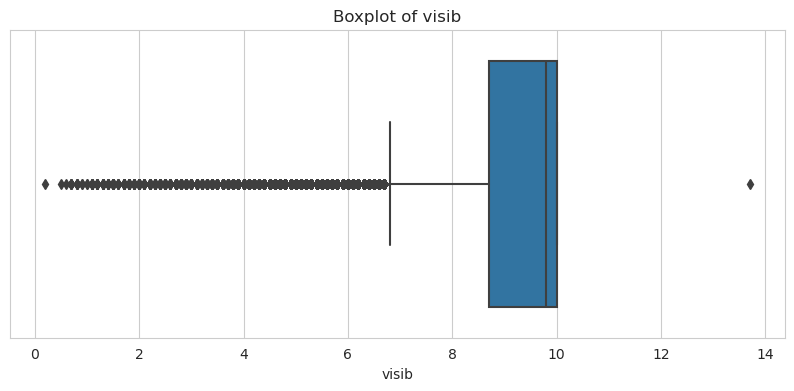

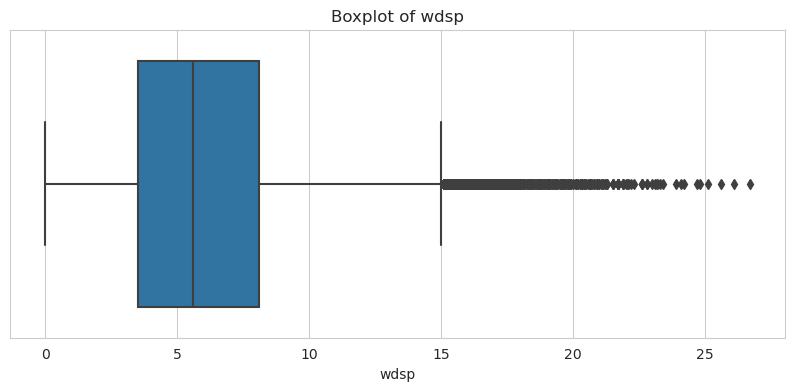

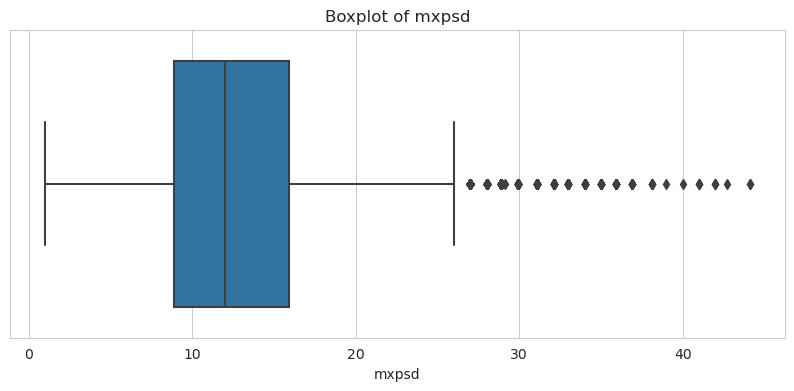

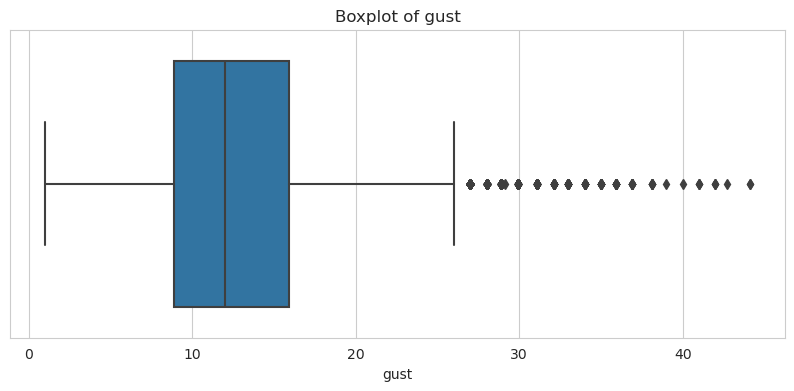

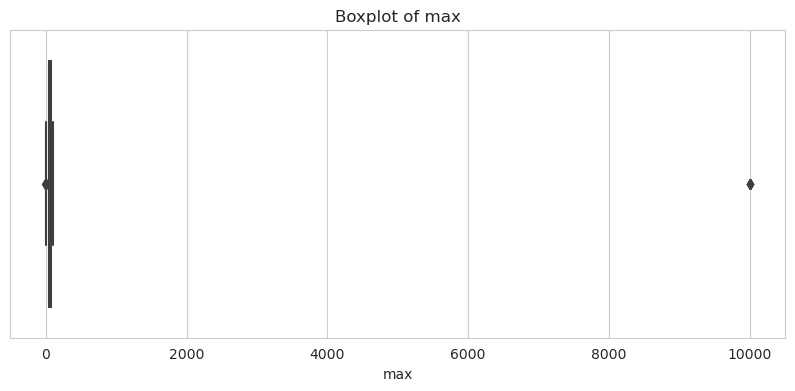

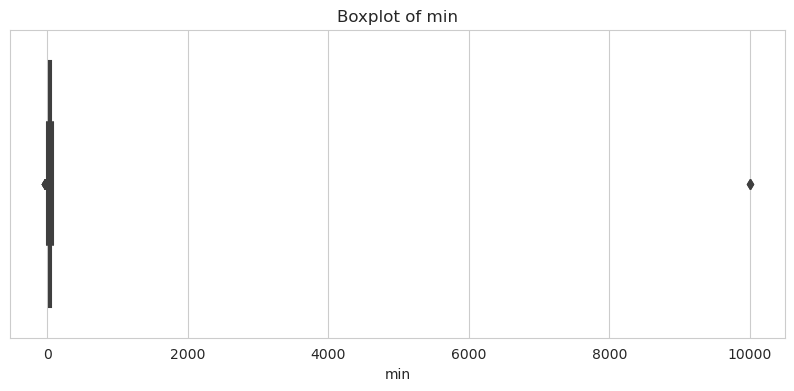

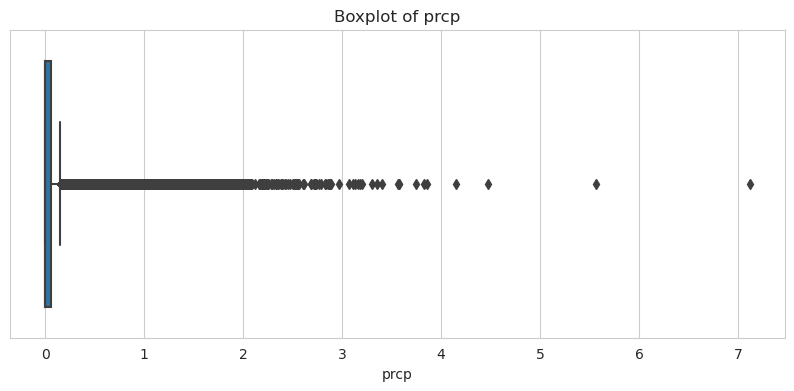

In [22]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=weather_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [23]:
# Calculate IQR for each numerical column
for col in num_cols:
    Q1 = weather_df[col].quantile(0.25)
    Q3 = weather_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = weather_df[(weather_df[col] < lower_bound) | (weather_df[col] > upper_bound)]
    
    # Print the number of outliers
    print(f"{col} has {outliers.shape[0]} outliers")

temp has 11 outliers
dewp has 5638 outliers
slp has 5648 outliers
stp has 14686 outliers
visib has 4237 outliers
wdsp has 960 outliers
mxpsd has 707 outliers
gust has 707 outliers
max has 8 outliers
min has 97 outliers
prcp has 7763 outliers


When dealing with weather data, having outliers isn't necessarily abnormal. Weather is influenced by a multitude of factors and can sometimes exhibit significant natural variability, which might be captured as outliers in a statistical sense. For instance, extreme weather events like storms or heatwaves will produce data points that are far from the average but are valid and important for the dataset.

### Principle Component Analysis
##### Feature Selection and Dimensionality Reduction

In [24]:
weather_df.head()

,index,date,name,stn,wban,temp,dewp,slp,stp,visib,...,gust,max,min,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,0,2016-01-01 00:00:00+00:00,ADIRONDACK REGIONAL ARPT,726228,94740,27.0,23.5,1013.0,951.5,6.7,...,11.1,28.4,23.0,0.02,0,0,1,0,0,0
1,1,2016-01-02 00:00:00+00:00,ADIRONDACK REGIONAL ARPT,726228,94740,23.8,19.4,1011.4,949.8,7.6,...,12.0,28.0,21.9,0.02,0,0,1,0,0,0
2,2,2016-01-03 00:00:00+00:00,ADIRONDACK REGIONAL ARPT,726228,94740,26.8,24.0,1005.2,944.2,6.4,...,15.0,30.0,19.0,0.01,1,1,1,0,0,0
3,3,2016-01-04 00:00:00+00:00,ADIRONDACK REGIONAL ARPT,726228,94740,4.2,-1.1,1022.3,956.0,5.1,...,8.9,30.0,-9.9,0.06,0,0,1,0,0,0
4,4,2016-01-05 00:00:00+00:00,ADIRONDACK REGIONAL ARPT,726228,94740,-13.7,-18.1,1035.2,969.5,9.3,...,4.1,-4.0,-22.0,0.00,0,0,0,0,0,0


In [25]:
# importing necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [26]:
# Drop name (not relevant), temperature (target) and date (timestamp)
features_for_pca = weather_df.drop(['name', 'temp', 'date'], axis=1)

In [27]:
# Ensure all data is numerical
features_for_pca = features_for_pca.apply(pd.to_numeric, errors='coerce')

In [28]:
# fill or handle any NaN values that resulted from coercion
features_for_pca.fillna(method='ffill', inplace=True)

In [29]:
# Standardize the numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_pca)

In [30]:
# Apply PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)
principal_components

array([[-6.57370386e-01, -5.79621902e-01, -1.30793731e+00, ...,
         3.59930856e-02,  5.36625993e-02, -1.68846032e-01],
       [-6.99871373e-01, -4.21361792e-01, -8.75186747e-01, ...,
        -1.25798596e-03,  1.65143075e-01, -2.57740346e-01],
       [-2.27088686e+00, -1.07524492e-01, -3.20229367e+00, ...,
        -3.70386068e-01, -9.58453996e-01, -2.67553194e-01],
       ...,
       [ 1.85793324e+00,  3.16953232e+00,  2.38481333e-01, ...,
         4.93267650e-02,  6.02800807e-01,  1.98371000e+00],
       [ 2.11753679e+00,  2.72284121e+00, -1.71055566e-01, ...,
         8.88446843e-02,  4.97907800e-01,  2.06487740e+00],
       [ 2.54104468e+00,  2.38785163e+00,  2.50392336e-01, ...,
         6.06714792e-02,  6.32852791e-01,  1.93483617e+00]])

In [31]:
# Convert the principal components into a pandas dataframe
pc_df = pd.DataFrame(data=principal_components)

In [32]:
# add back some date information as numerical features (may contain important about seasons)
weather_df['day_of_year'] = weather_df['date'].dt.dayofyear

In [33]:
# Combine the PCA features with the day of year
final_features = pd.concat([pc_df, weather_df[['day_of_year']]], axis=1)

In [34]:
final_features.replace([np.inf, -np.inf], np.nan, inplace=True)
final_features.fillna(final_features.mean(), inplace=True)
final_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,day_of_year
0,-0.657370,-0.579622,-1.307937,-1.762652,0.986143,0.829863,0.626720,-0.013607,-1.164368,0.832639,1.677770,1.214854,0.035993,0.053663,-0.168846,1
1,-0.699871,-0.421362,-0.875187,-1.755278,0.934893,0.837213,0.640212,-0.019493,-1.233188,0.821601,1.634002,1.205071,-0.001258,0.165143,-0.257740,2
2,-2.270887,-0.107524,-3.202294,-1.116809,0.957429,0.742871,0.678451,-0.004216,-1.179798,-0.086435,0.046665,1.503611,-0.370386,-0.958454,-0.267553,3
3,-0.297999,-1.211373,-2.287428,-1.949050,0.719589,0.810552,0.584250,-0.010987,-1.130488,0.904976,1.839191,1.024202,-0.243216,-0.114630,-0.009197,4
4,1.652088,-2.733037,-0.023535,-1.008762,-0.852325,0.445977,0.246589,-0.073089,-1.163636,0.622185,0.005368,0.861927,-0.571418,0.204659,-0.347044,5


### Data Modelling

In [35]:
final_features.columns = final_features.columns.astype(str)

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features, weather_df['temp'], test_size=0.2, random_state=42)

In [37]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [38]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Predict on the test data
y_pred = rf_regressor.predict(X_test)

In [40]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [41]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R-squared (R2 ): {r2:.2f}")

Mean Absolute Error (MAE): 2.65
Mean Squared Error (MSE): 12.60
Root Mean Squared Error (RMSE): 3.5500380629002657
R-squared (R2 ): 0.96
